<a href="https://colab.research.google.com/github/boomboom-98/MMC/blob/main/Lab_1_2_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [14]:
cdf = pd.read_csv('life_expectancy.csv',delimiter ='\t')
cdf.head()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3


In [15]:
cdf.describe()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


In [16]:
cdf

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3
5,1980,70.7,78.1,63.8,72.5
6,1981,71.1,78.4,64.5,73.2
7,1982,71.5,78.7,65.1,73.6
8,1983,71.6,78.7,65.2,73.5
9,1984,71.8,78.7,65.3,73.6


In [17]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [18]:
cdf.columns

Index(['Year', 'WhiteMale', 'WhiteFemale', 'BlackMale', 'BlackFemale'], dtype='object')

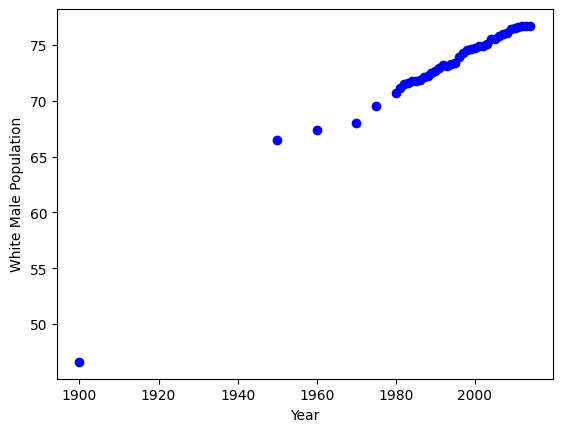

In [19]:
plt.scatter(cdf.Year, cdf.WhiteMale, color = 'blue')
plt.xlabel('Year')
plt.ylabel('White Male Population')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
x_train = np.asanyarray(train[['Year']])
y_train = np.asanyarray(train[['WhiteMale']])
regr.fit(x_train, y_train)
print('Coeficient:' , regr.coef_)
print('Intercept: ', regr.intercept_)

Coeficient: [[0.23722182]]
Intercept:  [-399.64073328]


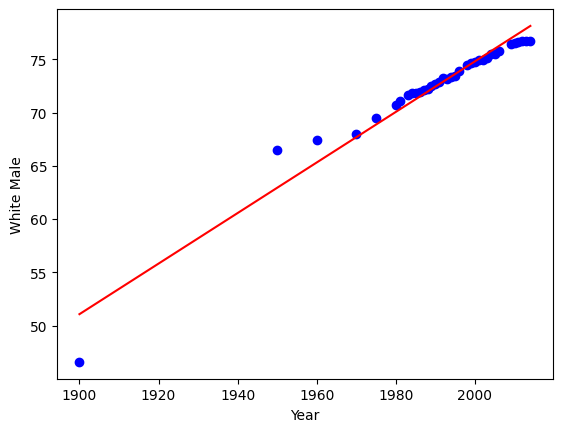

In [25]:
plt.scatter(train.Year, train.WhiteMale, color='blue')
plt.plot(x_train, regr.coef_[0][0]*x_train + regr.intercept_[0], 'r')
plt.xlabel('Year')
plt.ylabel('White Male')
plt.show()

# Đánh giá.
* Sử dụng giá trị MSE và R2_score để đánh giá

In [29]:
from sklearn.metrics import r2_score

In [33]:
# Xử lý data feature và label trước khi đưa vào mô hình
x_test = np.asanyarray(test[['Year']])
y_test = np.asanyarray(test[['WhiteMale']])
y_hat = regr.predict(x_test)
print('MSE: ', np.mean((y_hat - y_test)**2))
print('R2_score: ', r2_score(y_hat, y_test))

MSE:  0.3886125353803355
R2_score:  0.9367899534971884


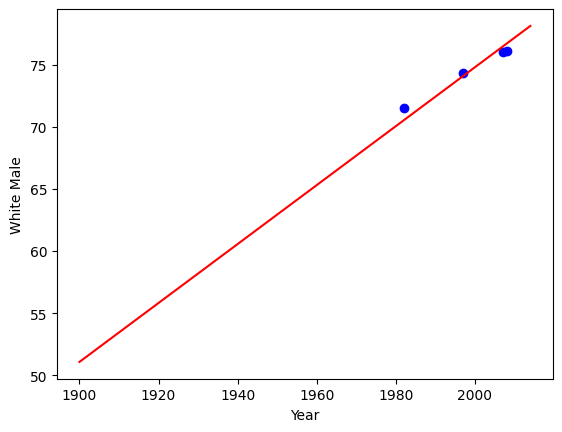

In [34]:
plt.scatter(test.Year, test.WhiteMale, color='blue')
plt.plot(x_train, regr.coef_[0][0]*x_train + regr.intercept_[0], 'r')
plt.xlabel('Year')
plt.ylabel('White Male')
plt.show()